# Visualizations

In [4]:
import pandas as pd
# %pip install scipy
from scipy import stats
# %pip install matplotlib
import matplotlib.pyplot as plt
# %pip install seaborn
import seaborn as sns
url = "https://raw.githubusercontent.com/nkmwicz/data-for-students/refs/heads/main/soccer-players.csv"
df = pd.read_csv(url)
df.head(5)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [ ]:
from scripts.eda import eda

eda(df)

DF shape = (32403, 23)
====Numeric Columns====
player_id
	 is numeric
	 # Nullish = 0
	 Mean = 344578.92571675463
	 Median = 282421.0
	 Mode = 10
	 ST.Dev = 280683.140
	 33%ile = 164008.24
	 66%ile = 409539.4
last_season
	 is numeric
	 # Nullish = 0
	 Mean = 2019.3377773662933
	 Median = 2020.0
	 Mode = 2024
	 ST.Dev = 3.966
	 33%ile = 2017.0
	 66%ile = 2022.0
current_club_id
	 is numeric
	 # Nullish = 0
	 Mean = 4809.252044563775
	 Median = 1071.0
	 Mode = 2553
	 ST.Dev = 11601.983
	 33%ile = 589.0
	 66%ile = 2441.0
height_in_cm
	 is numeric
	 # Nullish = 2344
	 Mean = 182.29116071725608
	 Median = 183.0
	 Mode = 180.0
	 ST.Dev = 6.971
	 33%ile = 179.0
	 66%ile = 185.0
market_value_in_eur
	 is numeric
	 # Nullish = 1534
	 Mean = 1611350.0599306747
	 Median = 250000.0
	 Mode = 100000.0
	 ST.Dev = 6362017.247
	 33%ile = 150000.0
	 66%ile = 400000.0
highest_market_value_in_eur
	 is numeric
	 # Nullish = 1534
	 Mean = 3675044.705043895
	 Median = 800000.0
	 Mode = 100000.0
	 ST.Dev = 9653

## Anatomy of a Viz

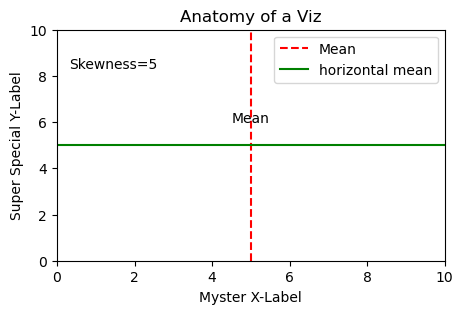

In [25]:
plt.figure(figsize=(5,3))
plt.title("Anatomy of a Viz")
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel("Myster X-Label")
plt.ylabel("Super Special Y-Label")
mu = 5
text_str = "Mean"
plt.axvline(x=mu, color="r", linestyle="--", label="Mean") # create vertical line
plt.axhline(y=mu, color="g", label="horizontal mean")
plt.text(x=5, y=6, s=text_str, ha="center")
plt.text(x=0.15, y=.75, s="Skewness=5", ha="left", transform=plt.gcf().transFigure)
plt.legend()
plt.show()

## Histograms

In [27]:
df = df[["position","height_in_cm","date_of_birth"]]
df["date_of_birth"] = pd.to_datetime(df["date_of_birth"])
df = df.dropna(subset=["height_in_cm"])
df = df.loc[df['height_in_cm'] > 150]
df.head()

,position,height_in_cm,date_of_birth
0,Attack,184.0,1978-06-09
1,Goalkeeper,190.0,1980-08-06
4,Goalkeeper,194.0,1981-03-18
7,Midfield,179.0,1980-10-04
8,Goalkeeper,193.0,1976-06-13


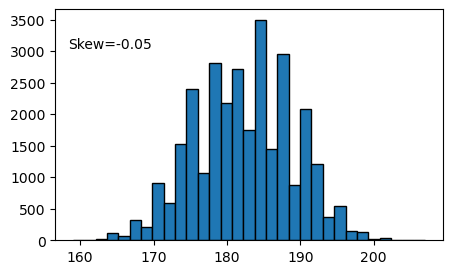

In [34]:
plt.figure(figsize=(5,3))
# plt.hist(x=df["height_in_cm"], bins=10) bad practice
# cube-root of all observations
bins = int(df["height_in_cm"].count() ** (1/3))
plt.hist(df["height_in_cm"], bins=bins, edgecolor="black")
sk = stats.skew(df["height_in_cm"], nan_policy="omit").round(2)
plt.text(x=.15, y=0.75, s=f"Skew={sk}", transform=plt.gcf().transFigure)

plt.show()

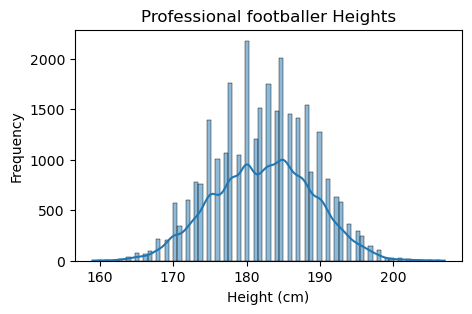

In [48]:
plt.figure(figsize=(5,3))
hist = sns.histplot(data=df, x="height_in_cm", kde=True)
hist.set(xlabel="Height (cm)")
plt.title("Professional footballer Heights")
plt.ylabel("Frequency")
plt.show()

## Box Plots

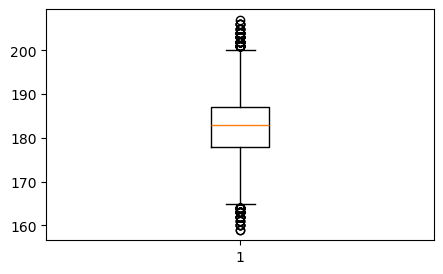

In [49]:
plt.figure(figsize=(5,3))

plt.boxplot(x=df["height_in_cm"])

plt.show()

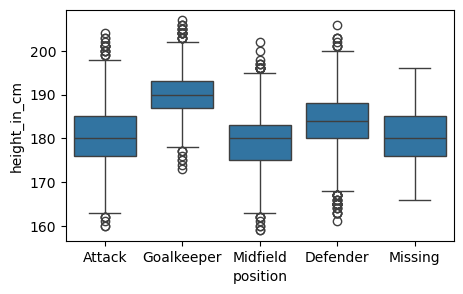

In [52]:
plt.figure(figsize=(5,3))
# box = sns.boxplot(data=df, y="height_in_cm")
boxes = sns.boxplot(data=df, y="height_in_cm", x="position")
plt.show()

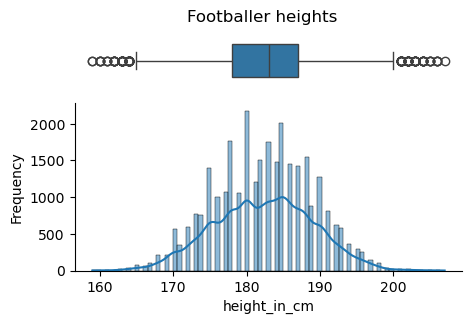

In [67]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, 
    ncols=1, 
    height_ratios=[0.2,0.8], 
    figsize=(5,3))

box = sns.boxplot(data=df, x="height_in_cm", ax=ax1)
hist = sns.histplot(data=df, x="height_in_cm", ax=ax2, kde=True)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax1.set(yticks=[])
ax1.set(xticks=[])
ax1.set(xlabel="")
ax2.set(ylabel="Frequency")
fig.suptitle("Footballer heights")

plt.show()